In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_dataset = pd.read_csv('car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [7]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [11]:
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2,}}, inplace=True)

car_dataset.replace({'Seller_Type':{'Dealerl':0, 'Individual':1,}}, inplace=True)

car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1,}}, inplace=True)

/var/folders/j5/dkc78yfn5md1x9nh4j5146tr0000gn/T/ipykernel_61832/766854674.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2,}}, inplace=True)
/var/folders/j5/dkc78yfn5md1x9nh4j5146tr0000gn/T/ipykernel_61832/766854674.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1,}}, inplace=True)


In [12]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,0,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,0,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,0,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,0,0
4,swift,2014,4.60,6.87,42450,1,Dealer,0,0


In [21]:
X = car_dataset.drop(['Car_Name','Selling_Price','Owner','Seller_Type'],axis=1)
Y = car_dataset['Selling_Price']

In [22]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Transmission
0    2014           5.59       27000          0             0
1    2013           9.54       43000          1             0
2    2017           9.85        6900          0             0
3    2011           4.15        5200          0             0
4    2014           6.87       42450          1             0
..    ...            ...         ...        ...           ...
296  2016          11.60       33988          1             0
297  2015           5.90       60000          0             0
298  2009          11.00       87934          0             0
299  2017          12.50        9000          1             0
300  2016           5.90        5464          0             0

[301 rows x 5 columns]


In [23]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [24]:
#Splitting Training and Test Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [26]:
#Linear Regression

In [27]:
lin_reg_model = LinearRegression()

In [28]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [29]:
#Model Evaluation

In [30]:
training_data_prediction = lin_reg_model.predict(X_train)

In [31]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8713229600863454


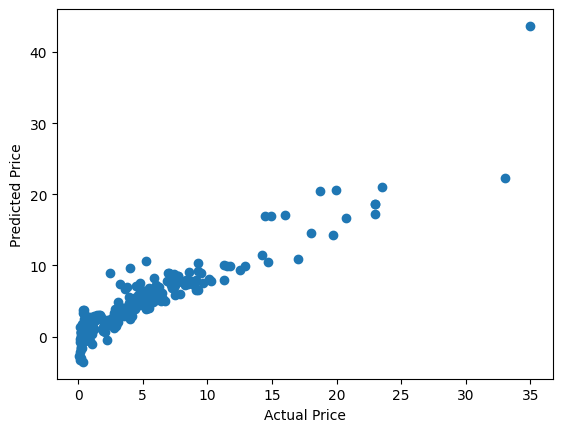

In [32]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [33]:
test_data_prediction = lin_reg_model.predict(X_test)

In [34]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8156890427043357


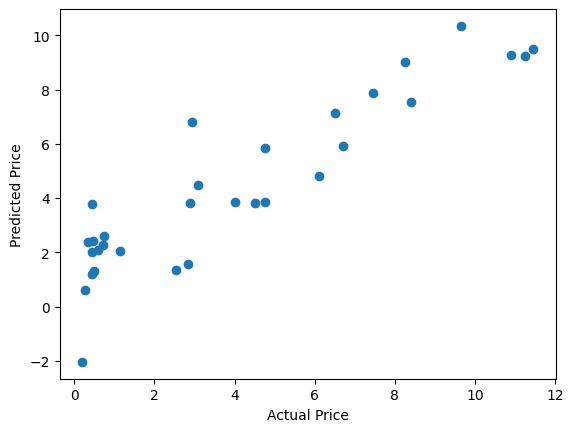

In [35]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [36]:
#Lasso Regeession

In [37]:
lass_reg_model = Lasso()

In [38]:
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [39]:
training_data_prediction = lass_reg_model.predict(X_train)

In [40]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


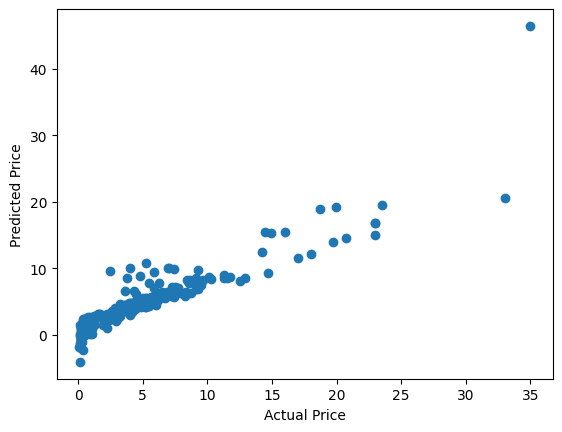

In [41]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [42]:
test_data_prediction = lass_reg_model.predict(X_test)

In [43]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


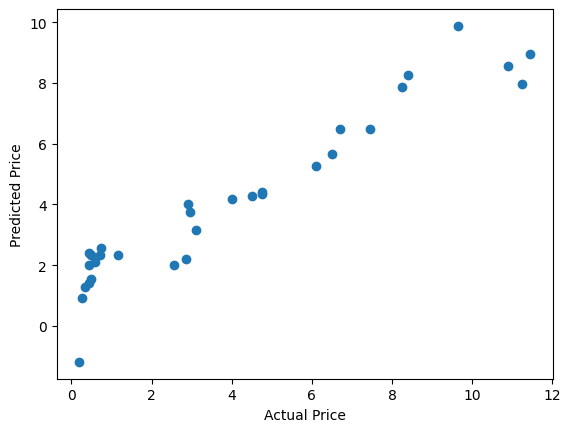

In [44]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()